In [1]:
import numpy as np
import os

# Imports nécessaires pour construire un modèle LeNet 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils.class_weight import compute_class_weight

# Pour la compilation du modèle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Pour visualiser les performances
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

# dataviz
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

print(tf.__version__)
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
tf.keras.backend.clear_session()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Chargement du dataset
#dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample"
#dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train"
dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced"
img_size = (224, 224)  # Taille cible
batch_size = 128
class_names = sorted(os.listdir(dir_name))
nb_class = len(class_names)

train_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)


# Ajout d'optimisation : mise en cache et préchargement
#train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

2025-03-24 13:25:54.731667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742819154.768636    3189 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742819154.780571    3189 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742819154.834512    3189 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742819154.834546    3189 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742819154.834548    3189 computation_placer.cc:177] computation placer alr

2.19.0
Num GPUs Available:  1
Found 54000 files belonging to 27 classes.
Using 43200 files for training.


I0000 00:00:1742819188.611712    3189 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 54000 files belonging to 27 classes.
Using 10800 files for validation.


## Analyse de l'entrainement

In [2]:
def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()






## modèle ResNet50

Phase 1: Entraînement avec modèle de base gelé
Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.1555 - loss: 3.6509  

2025-03-24 13:57:58.005375: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 148s 420ms/step - accuracy: 0.1557 - loss: 3.6496 - val_accuracy: 0.4023 - val_loss: 2.3990 - learning_rate: 0.0010
Epoch 2/10


2025-03-24 13:58:25.831237: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.3367 - loss: 2.5932  

2025-03-24 14:00:18.107337: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 139s 412ms/step - accuracy: 0.3367 - loss: 2.5930 - val_accuracy: 0.4472 - val_loss: 2.1634 - learning_rate: 0.0010
Epoch 3/10


2025-03-24 14:00:45.253734: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.3735 - loss: 2.3777  

2025-03-24 14:02:37.507226: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 139s 412ms/step - accuracy: 0.3736 - loss: 2.3776 - val_accuracy: 0.4573 - val_loss: 2.0624 - learning_rate: 0.0010
Epoch 4/10


2025-03-24 14:03:04.563205: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.3945 - loss: 2.2966  

2025-03-24 14:04:56.911388: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 139s 412ms/step - accuracy: 0.3945 - loss: 2.2966 - val_accuracy: 0.4661 - val_loss: 2.0280 - learning_rate: 0.0010
Epoch 5/10


2025-03-24 14:05:23.968770: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.4045 - loss: 2.2343  

2025-03-24 14:07:16.700630: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 140s 414ms/step - accuracy: 0.4045 - loss: 2.2342 - val_accuracy: 0.4799 - val_loss: 1.9503 - learning_rate: 0.0010
Epoch 6/10


2025-03-24 14:07:43.744444: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.4155 - loss: 2.2039  

2025-03-24 14:09:36.334970: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 140s 414ms/step - accuracy: 0.4155 - loss: 2.2039 - val_accuracy: 0.4834 - val_loss: 1.9657 - learning_rate: 0.0010
Epoch 7/10


2025-03-24 14:10:03.818980: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.4181 - loss: 2.1894  

2025-03-24 14:11:56.597020: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 140s 414ms/step - accuracy: 0.4182 - loss: 2.1894 - val_accuracy: 0.4870 - val_loss: 1.9297 - learning_rate: 0.0010
Epoch 8/10


2025-03-24 14:12:23.826411: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.4268 - loss: 2.1730  

2025-03-24 14:14:16.223231: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 139s 412ms/step - accuracy: 0.4268 - loss: 2.1730 - val_accuracy: 0.4920 - val_loss: 1.9174 - learning_rate: 0.0010
Epoch 9/10


2025-03-24 14:14:43.244160: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.4261 - loss: 2.1615  

2025-03-24 14:16:36.007547: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 140s 413ms/step - accuracy: 0.4261 - loss: 2.1615 - val_accuracy: 0.4920 - val_loss: 1.9125 - learning_rate: 0.0010
Epoch 10/10


2025-03-24 14:17:02.917092: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.4264 - loss: 2.1566  

2025-03-24 14:18:55.398813: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 140s 413ms/step - accuracy: 0.4264 - loss: 2.1566 - val_accuracy: 0.5009 - val_loss: 1.9100 - learning_rate: 0.0010
Phase 2: Fine-tuning
Epoch 1/20


2025-03-24 14:19:30.385074: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4413 - loss: 2.1121  

2025-03-24 14:21:45.728825: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 175s 496ms/step - accuracy: 0.4414 - loss: 2.1120 - val_accuracy: 0.5118 - val_loss: 1.8307 - learning_rate: 2.0000e-05
Epoch 2/20


2025-03-24 14:22:18.072535: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.4711 - loss: 2.0024  

2025-03-24 14:24:31.513370: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 161s 476ms/step - accuracy: 0.4711 - loss: 2.0024 - val_accuracy: 0.5191 - val_loss: 1.8019 - learning_rate: 2.0000e-05
Epoch 3/20


2025-03-24 14:24:59.213709: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.4864 - loss: 1.9459  

2025-03-24 14:27:12.886150: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 161s 476ms/step - accuracy: 0.4864 - loss: 1.9458 - val_accuracy: 0.5264 - val_loss: 1.7776 - learning_rate: 2.0000e-05
Epoch 4/20


2025-03-24 14:27:40.081817: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4966 - loss: 1.8999  

2025-03-24 14:29:53.070006: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 474ms/step - accuracy: 0.4966 - loss: 1.8998 - val_accuracy: 0.5304 - val_loss: 1.7540 - learning_rate: 1.8097e-05
Epoch 5/20


2025-03-24 14:30:20.174004: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5084 - loss: 1.8629  

2025-03-24 14:32:32.295120: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5084 - loss: 1.8628 - val_accuracy: 0.5373 - val_loss: 1.7344 - learning_rate: 1.6375e-05
Epoch 6/20


2025-03-24 14:32:59.338933: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5165 - loss: 1.8359  

2025-03-24 14:35:11.478063: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5165 - loss: 1.8359 - val_accuracy: 0.5402 - val_loss: 1.7176 - learning_rate: 1.4816e-05
Epoch 7/20


2025-03-24 14:35:38.546384: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5257 - loss: 1.7961  

2025-03-24 14:37:50.731578: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5257 - loss: 1.7960 - val_accuracy: 0.5419 - val_loss: 1.7098 - learning_rate: 1.3406e-05
Epoch 8/20


2025-03-24 14:38:17.798784: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5283 - loss: 1.7805  

2025-03-24 14:40:29.823793: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5283 - loss: 1.7805 - val_accuracy: 0.5459 - val_loss: 1.6935 - learning_rate: 1.2131e-05
Epoch 9/20


2025-03-24 14:40:56.861803: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5371 - loss: 1.7502  

2025-03-24 14:43:09.084893: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5371 - loss: 1.7501 - val_accuracy: 0.5481 - val_loss: 1.6884 - learning_rate: 1.0976e-05
Epoch 10/20


2025-03-24 14:43:36.111216: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5415 - loss: 1.7322  

2025-03-24 14:45:48.238948: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5415 - loss: 1.7322 - val_accuracy: 0.5495 - val_loss: 1.6856 - learning_rate: 9.9317e-06
Epoch 11/20


2025-03-24 14:46:15.274856: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5440 - loss: 1.7102  

2025-03-24 14:48:27.806967: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 472ms/step - accuracy: 0.5440 - loss: 1.7102 - val_accuracy: 0.5549 - val_loss: 1.6747 - learning_rate: 8.9866e-06
Epoch 12/20


2025-03-24 14:48:54.902055: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5538 - loss: 1.6957  

2025-03-24 14:51:08.327269: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 475ms/step - accuracy: 0.5538 - loss: 1.6956 - val_accuracy: 0.5531 - val_loss: 1.6693 - learning_rate: 8.1314e-06
Epoch 13/20


2025-03-24 14:51:35.338306: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5567 - loss: 1.6791  

2025-03-24 14:53:49.475369: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 161s 477ms/step - accuracy: 0.5567 - loss: 1.6790 - val_accuracy: 0.5569 - val_loss: 1.6626 - learning_rate: 7.3576e-06
Epoch 14/20


2025-03-24 14:54:16.575809: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5569 - loss: 1.6665  

2025-03-24 14:56:29.936571: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 475ms/step - accuracy: 0.5569 - loss: 1.6664 - val_accuracy: 0.5587 - val_loss: 1.6581 - learning_rate: 6.6574e-06
Epoch 15/20


2025-03-24 14:56:56.998450: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5644 - loss: 1.6506  

2025-03-24 14:59:10.262959: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 474ms/step - accuracy: 0.5644 - loss: 1.6506 - val_accuracy: 0.5606 - val_loss: 1.6543 - learning_rate: 6.0239e-06
Epoch 16/20


2025-03-24 14:59:37.371229: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5653 - loss: 1.6423  

2025-03-24 15:01:50.090614: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 473ms/step - accuracy: 0.5653 - loss: 1.6422 - val_accuracy: 0.5615 - val_loss: 1.6530 - learning_rate: 5.4506e-06
Epoch 17/20


2025-03-24 15:02:17.186957: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5659 - loss: 1.6286  

2025-03-24 15:04:29.976826: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 473ms/step - accuracy: 0.5659 - loss: 1.6286 - val_accuracy: 0.5610 - val_loss: 1.6490 - learning_rate: 4.9319e-06
Epoch 18/20


2025-03-24 15:04:56.930773: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5717 - loss: 1.6133  

2025-03-24 15:07:09.762942: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 473ms/step - accuracy: 0.5717 - loss: 1.6132 - val_accuracy: 0.5611 - val_loss: 1.6464 - learning_rate: 4.4626e-06
Epoch 19/20


2025-03-24 15:07:36.710068: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5697 - loss: 1.6113  

2025-03-24 15:09:49.556875: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 160s 473ms/step - accuracy: 0.5697 - loss: 1.6113 - val_accuracy: 0.5624 - val_loss: 1.6420 - learning_rate: 4.0379e-06
Epoch 20/20


2025-03-24 15:10:16.657362: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5732 - loss: 1.6105  

2025-03-24 15:12:28.786921: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 114295296 bytes after encountering the first element of size 114295296 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


338/338 ━━━━━━━━━━━━━━━━━━━━ 159s 471ms/step - accuracy: 0.5732 - loss: 1.6105 - val_accuracy: 0.5627 - val_loss: 1.6389 - learning_rate: 3.6537e-06
Analyse entraintement ResNet50 (base)


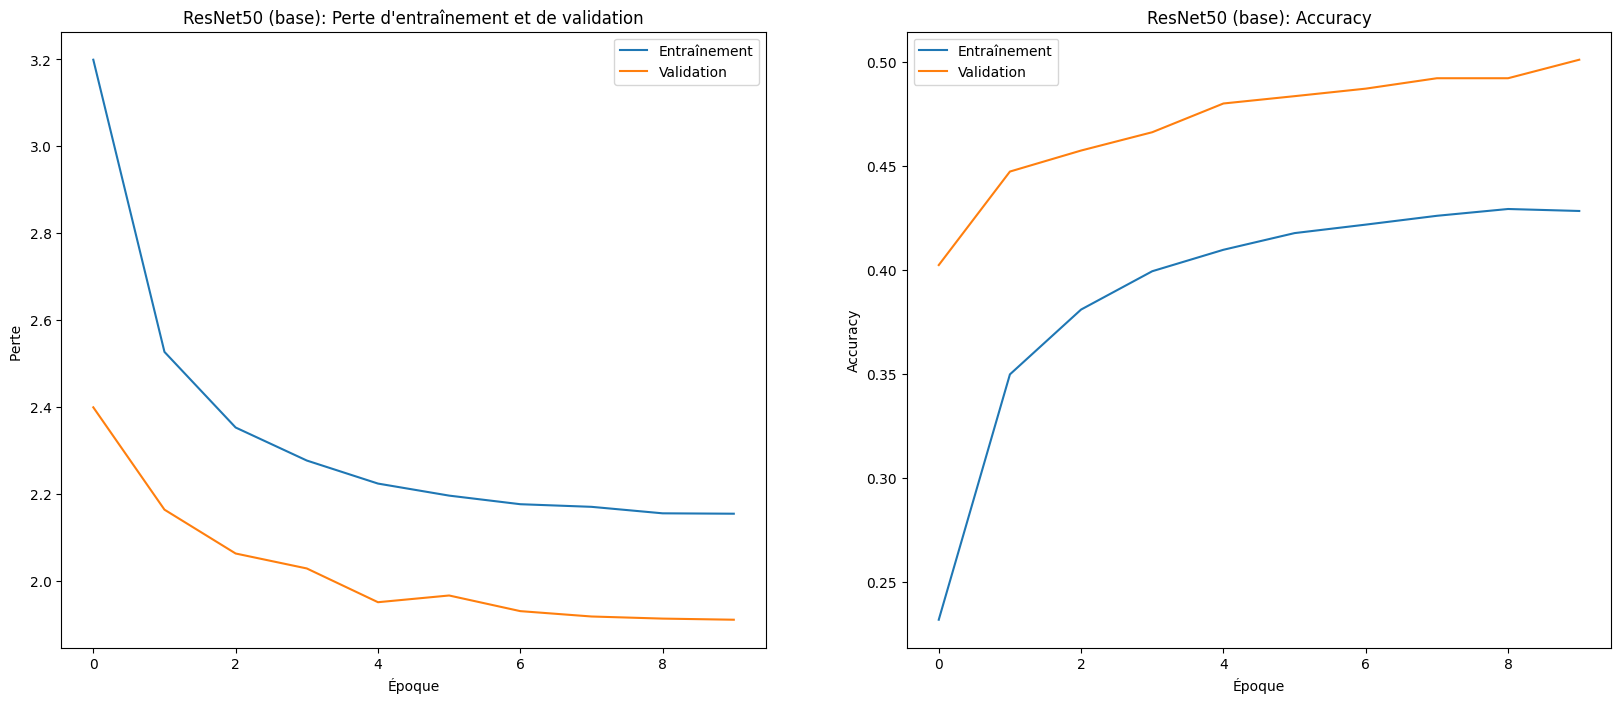

Analyse entraintement ResNet50 (fine tunning)


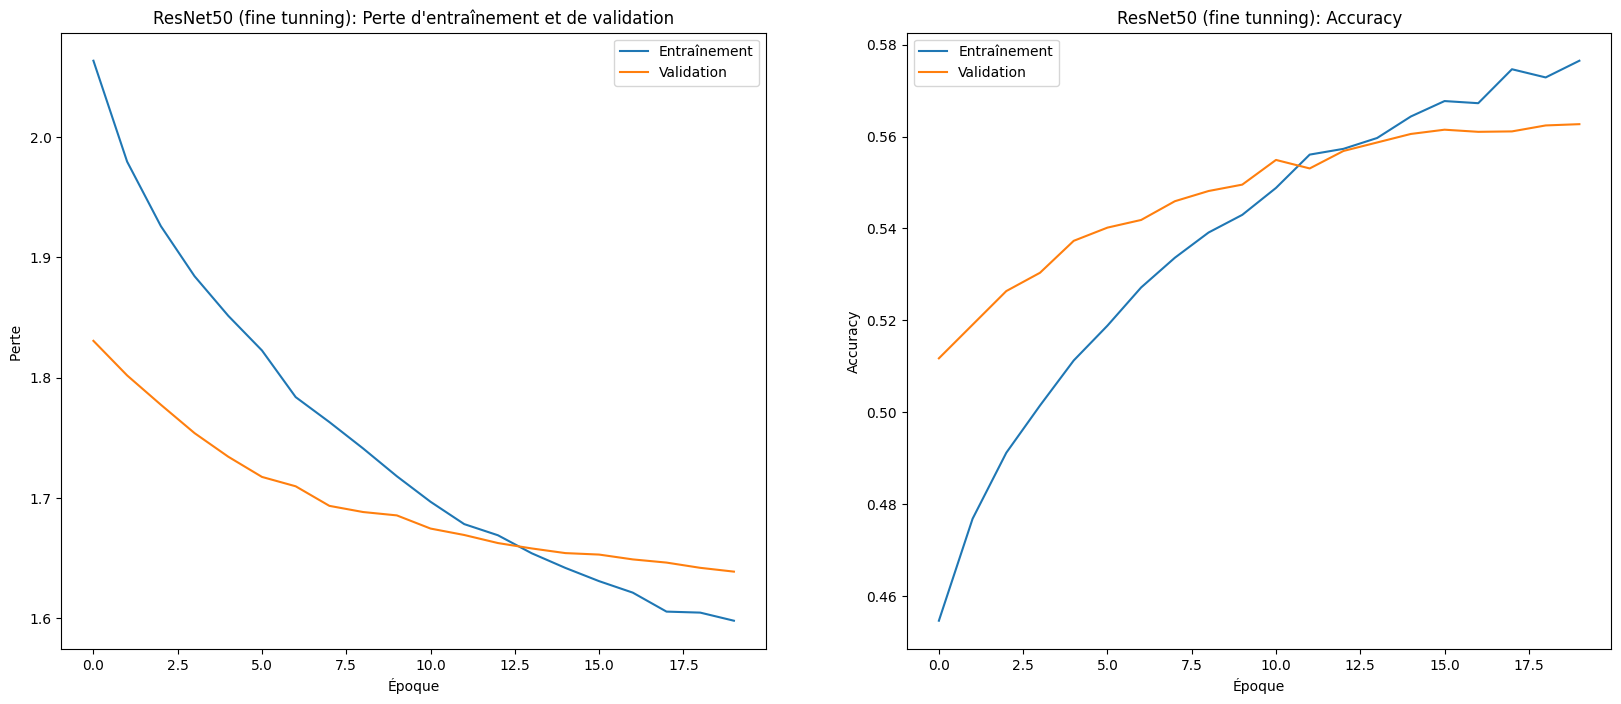

In [4]:
import tensorflow as tf 

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])


# 1. Instancie le modèle pré-entrainé
base_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Geler le modèle de base


# 2. Construire le modèle complet
model = tf.keras.Sequential([
    # Augmentation de données
    data_augmentation,
    
    # Prétraitement spécifique au modèle
    tf.keras.layers.Lambda(lambda x: tf.keras.applications.resnet.preprocess_input(x)),
    #tf.keras.layers.Rescaling(1./127.5, offset=-1),  
    
    # Modèle de base
    base_model,
    
    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(nb_class, activation='softmax')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Étape 2: Entraîner avec le modèle de base gelé
print("Phase 1: Entraînement avec modèle de base gelé")

model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),                 
    metrics=['accuracy'])             

model_history = model.fit(train_ds,           
                           validation_data=val_ds,
                           epochs=10,
                           callbacks=[early_stopping, reduce_lr])    

# Étape 3: Fine-tuning - dégeler partiellement le modèle de base
print("Phase 2: Fine-tuning")

base_model.trainable = False

for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompiler avec un taux d'apprentissage plus faible
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),  
    metrics=['accuracy']
)

# Learning rate scheduler
import math

def lr_scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * math.exp(-0.1)  

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Entraîner avec fine-tuning
history_phase2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping, lr_callback]
)


# Analyse de l'entainement
print("Analyse entraintement ResNet50 (base)")
display_results(model_history, "ResNet50 (base)")

# Analyse de l'entainement
print("Analyse entraintement ResNet50 (fine tunning)")
display_results(history_phase2, "ResNet50 (fine tunning)")